# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [3]:
#Setup my dataframe
cities_df = pd.DataFrame(cities)
cities_df = cities_df.rename(columns={0:'City'})
cities_df.head()

#Setup where i'll be storing the data for the different columns
cloud = []
country = []
date = []
humid = []
lat = []
lng = []
temp = []
wind = []
name = []

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).



In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
# Beginning part of the print log 
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Get weather data
# for each city in the 'cities', get the needed data
# and add that to the dataframe.

city_record = 1

for city in cities:    
    try:
        response = requests.get(query_url+ city).json()
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humid.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        name.append(response['name'])
        
        print(f'Processing record {city_record} for city named: {city}')
        print(f'{query_url}{city}')
        
        city_record += 1

    except (KeyError, IndexError):
  
        print('Missing field/result....skipping.')
    except:
        print(f'Failed on {city}.')
    continue
    time.sleep(1)

Beginning Data Retrieval
-------------------------------
Processing record 1 for city named: busselton
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=busselton
Processing record 2 for city named: kavieng
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=kavieng
Processing record 3 for city named: nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=nanortalik
Processing record 4 for city named: basco
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=basco
Processing record 5 for city named: mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=mar del plata
Processing record 6 for city named: mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=m

Processing record 53 for city named: rikitea
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=rikitea
Missing field/result....skipping.
Missing field/result....skipping.
Processing record 54 for city named: lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=lavrentiya
Processing record 55 for city named: cascais
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=cascais
Processing record 56 for city named: bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=bandarbeyla
Processing record 57 for city named: bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=bathsheba
Processing record 58 for city named: kaeo
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=

Processing record 103 for city named: kirakira
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=kirakira
Processing record 104 for city named: ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=ambilobe
Missing field/result....skipping.
Processing record 105 for city named: port hardy
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=port hardy
Processing record 106 for city named: vila velha
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=vila velha
Processing record 107 for city named: quatre cocos
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=quatre cocos
Processing record 108 for city named: northam
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=northa

Processing record 153 for city named: sitka
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=sitka
Processing record 154 for city named: klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=klaksvik
Processing record 155 for city named: wucheng
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=wucheng
Processing record 156 for city named: benghazi
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=benghazi
Processing record 157 for city named: ponta delgada
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=ponta delgada
Processing record 158 for city named: ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=ixtapa
Processing record 159 for city named: valea mare

Processing record 204 for city named: qeshm
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=qeshm
Processing record 205 for city named: tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=tuatapere
Processing record 206 for city named: sainte-marie
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=sainte-marie
Processing record 207 for city named: cayenne
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=cayenne
Processing record 208 for city named: faanui
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=faanui
Processing record 209 for city named: mattru
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=mattru
Processing record 210 for city named: itaqui
http://

Processing record 255 for city named: rio grande
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=rio grande
Processing record 256 for city named: lhokseumawe
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=lhokseumawe
Processing record 257 for city named: telimele
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=telimele
Processing record 258 for city named: marsh harbour
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=marsh harbour
Processing record 259 for city named: marica
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=marica
Processing record 260 for city named: kamaishi
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=kamaishi
Processing record 261 for city

Processing record 306 for city named: aykhal
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=aykhal
Processing record 307 for city named: santa lucia
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=santa lucia
Processing record 308 for city named: coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=coquimbo
Processing record 309 for city named: miaoli
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=miaoli
Processing record 310 for city named: portland
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=portland
Processing record 311 for city named: haputale
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=haputale
Processing record 312 for city named: vestmannae

Processing record 358 for city named: young
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=young
Processing record 359 for city named: madimba
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=madimba
Processing record 360 for city named: hecun
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=hecun
Processing record 361 for city named: dabat
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=dabat
Processing record 362 for city named: namibe
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=namibe
Processing record 363 for city named: turtas
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=turtas
Processing record 364 for city named: hambantota
http://api.openweathermap

Processing record 410 for city named: saldanha
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=saldanha
Processing record 411 for city named: sadsalan
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=sadsalan
Processing record 412 for city named: eureka
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=eureka
Missing field/result....skipping.
Processing record 413 for city named: ondjiva
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=ondjiva
Processing record 414 for city named: nome
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=nome
Processing record 415 for city named: launceston
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=launceston
Processing record 416 

Processing record 460 for city named: fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=fairbanks
Processing record 461 for city named: margate
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=margate
Processing record 462 for city named: sabha
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=sabha
Processing record 463 for city named: rize
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=rize
Processing record 464 for city named: wiang sa
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=wiang sa
Processing record 465 for city named: verkhoyansk
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=verkhoyansk
Processing record 466 for city named: lata
http://api.

Processing record 510 for city named: muhos
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=muhos
Processing record 511 for city named: stabat
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=stabat
Missing field/result....skipping.
Processing record 512 for city named: igrim
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=igrim
Processing record 513 for city named: raton
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=raton
Missing field/result....skipping.
Processing record 514 for city named: basoko
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=basoko
Processing record 515 for city named: xining
http://api.openweathermap.org/data/2.5/weather?appid=cb630cd875dbadcfbb1abe55a670d55b&units=imperial&q=xining
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
d1 = pd.Series(name, name='City')
d2 = pd.Series(cloud, name='Cloudiness')
d3 = pd.Series(date, name='Date')
d4 = pd.Series(humid, name='Humidity')
d5 = pd.Series(lat, name='Lat')
d6 = pd.Series(lng, name='Lng')
d7 = pd.Series(temp, name='Max_Temp')
d8 = pd.Series(wind, name='Wind_Speed')
d9 = pd.Series(country, name='Country')

               
data = pd.concat([d1,d2,d9,d3,d4,d5,d6,d7,d8], axis=1)
data.head

<bound method NDFrame.head of                City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0         Busselton           0      AU  1569909086        34 -33.64  115.35   
1           Kavieng         100      PG  1569909677        69  -2.57  150.80   
2        Nanortalik          91      GL  1569909089        60  60.14  -45.24   
3             Basco           1      US  1569909678        88  40.33  -91.20   
4     Mar del Plata          35      AR  1569909108        72 -46.43  -67.52   
5         Mahebourg          75      MU  1569909126        83 -20.41   57.70   
6          Araouane          21      ML  1569909244        11  18.90   -3.53   
7           Ushuaia          90      AR  1569909077        80 -54.81  -68.31   
8           Colares          20      PT  1569909680        88  38.80   -9.45   
9        Kaitangata          80      NZ  1569909134        55 -46.28  169.85   
10           Atuona          54      PF  1569909681        76  -9.80 -139.03   
11       G

In [7]:
# Check the counts for your data values 
data.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max_Temp      555
Wind_Speed    555
dtype: int64

In [8]:
cities_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

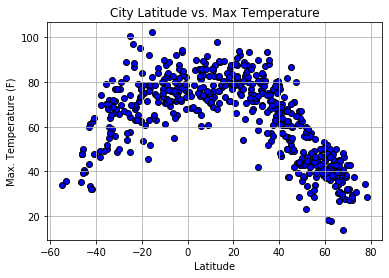

In [9]:
plt.scatter(data['Lat'], data['Max_Temp'], color="blue", alpha=1, edgecolor="black")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.title("City Latitude vs. Max Temperature")
plt.savefig("Latitude_and_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

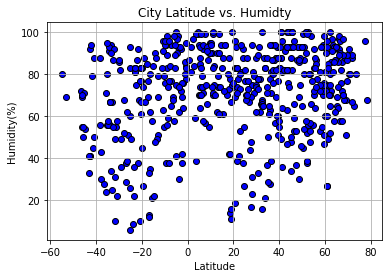

In [13]:
plt.scatter(data['Lat'], data['Humidity'], color="blue", alpha=1, edgecolor="black")
plt.grid()
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidty")
plt.savefig("Latitude_and_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

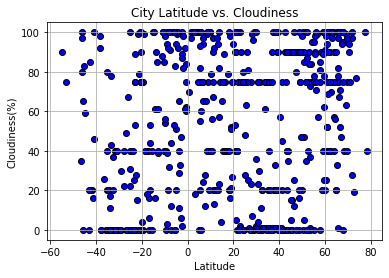

In [14]:
plt.scatter(data['Lat'], data['Cloudiness'], color="blue", alpha=1, edgecolor="black")
plt.grid()
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness")
plt.savefig("Latitude_and_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

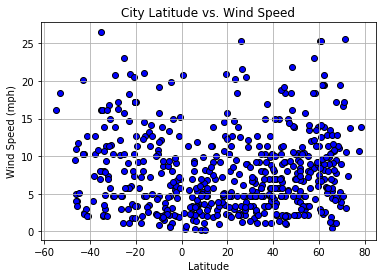

In [16]:
plt.scatter(data['Lat'], data['Wind_Speed'], color="blue", alpha=1, edgecolor="black")
plt.grid()
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed")
plt.savefig("Latitude_and_Wind.png")
plt.show()